## Least Squares Support Vector Regression in R: Investigating outlier-sensitivity in Machine Learning Models
##  Jennifer Dargin and Huan Luo

## 1. Motivation

In class, we learned that the least squares (LS) based regression model (e.g., ridge regression) is sensitive to the outliers existed in the dataset, which can bias the prediction of the fitted regression model. Machine learning (ML) techniques, as advanced statistical learning methods, have achieved great success in many disciplinaries. However, we have a question, that is, if a dataset is contaminated by outliers, will the ML methods, especially the LS based ML method, be affected by these outliers when using them to fit the contaminated dataset? If so, how far they will be negatively affected compared to the ridge regression? In this project, we would like to investigate how outliers affect the LS based ML models, explore the levels of negative interferences affected by outliers between LS based ML models and ridge regression, and validate the performance of existing solutions to reduce the negative affect of outliers for LS based ML techniques and ridge regression. Specifically, the main contributions in this project is organized as following:

1. We investigated a well-known LS based ML method, called least squares support vector regression (LS-SVR), which is originally developed by Suykens et al. (2002). The prediction performance between LS-SVR and ridge regression for a simulated dataset excluding the outliers is first compared to illustrate their original prediction capabilities (i.e., prediction is not negatively affected by outliers).

2. We randomly added the outliers to the simulated dataset. The size of outliers we added equals to the 10 percent of the total number of the simulated dataset. Then we re-fited these two models to the simulated dataset contaminated by the outliers, and the prediction performance of these two models for the contaminated dataset is compared as well as the comparision with those on the simulated dataset excluding outliers is also performed. Through this comparison, the levels of negative interferences affected by outliers between LS-SVR and ridge regression can be identified.

3. Two existing solutions to reduce the negative affect of outliers for LS-SVR and ridge regression were studied. The one for LS-SVR is called weighted LS-SVR, which is originally developed by Suykens et al. (2002), and another for ridge regression is called weighted LS, which is a well-known approach. The prediction performance of these two weighted models for the contaminated simulated dataset is compared and the performance comparison between these weighted and unweighted models is also conducted such that the effectiveness of these two existing solutions can be validated.

4. All of the codes regarding the developments of LS-SVR, ridge regression, weighted LS-SVR, and weighted ridge regression are developed from scratch using R programming language by the authors. There is no any packages used in this project. The detailed programming procedures are also presented.

## 2. Theory of LS-SVR and Ridge Regression

## 2.1 Theory of LS-SVR

The detailed information about the formulation of LS-SVR can be found in Suykens et al. (2002). Here, we briefly summarize the formulation and present the mathmatical equations necessary for the code developement, which can be found as follows.

Given the training set $\{(x_i,y_i)\}_{i=1}^n$, where $x_i \in R^{p}$ and $y_i \in R$, the objective of the LS-SVR is to find $w \in R^{h}$ and $b$ to minimize the following objective function:

\begin{align*}
min J(w,e) = \frac{1}{2}w^Tw + \frac{1}{2}\gamma\sum_{i=1}^ne_{i}^2                        
\end{align*}           


subject to:

$$y_i = w^T\varphi(x_i) + b + e_i, i = 1,...,n$$

Where $\varphi(\centerdot): R^p \rightarrow R^h$ is a function which maps the input space to a higher dimensional feature space; $e_i \in R$ is error variable; $\gamma \in R$ is regularization parameter; $b$ is bias term.  

The Lagrangian function for the equations above can be established as follows:

$$L(w,b,e;\alpha) = J(w,e) - \sum_{i=1}^n\alpha_i\{w^T\varphi(x_i)+b+e_i-y_i\}$$

Where $\alpha_i \in R$ (also called support values) is Lagrange multiplier. The Karush-Kuhn-Tucker(KKT) conditions for optimality are given by:

\begin{align*}
&\frac{\partial L}{\partial w}=0 \rightarrow w = \sum_{i=1}^n\alpha_i\varphi(x_i)\\
&\frac{\partial L}{\partial b}=0 \rightarrow \sum_{i=1}^n\alpha_i=0\\
&\frac{\partial L}{\partial e_i}=0 \rightarrow \alpha_i = \gamma e_i, i = 1,...,n\\
&\frac{\partial L}{\partial \alpha_i}=0 \rightarrow w^T\varphi(x_i)+b+e_i-y_i=0, i = 1,...,n
\end{align*}

After elimination of $w,e$, one can obtain the following matrix equation:

\begin{equation}
\left[
\begin{array}{cccc}
0 & 1_{1xn}\\
1_{nx1} & K_{nxn}+\frac{1}{\gamma}I_{nxn}
\end{array}
\right]
\left[
\begin{array}{cccc}
b\\
\alpha_{nx1}
\end{array}
\right]
=
\left[
\begin{array}{cccc}
0\\
y_{nx1}
\end{array}
\right ]
\end{equation}

Where $K_{nxn}(x_i,x_j)=\varphi(x_i)^T \varphi(x_j), i,j=1,...,n$ is a kernel function that meets the Mercer's condition.

After solving $\alpha_{nx1}$ and $b$, the resulting LS-SVR model for prediction can be obtained as follows:

$$ y(x) = \sum_{i=1}^n \alpha_iK(x,x_i)+b$$

In this project, we use RBF kernel, which is defined as follows:

$$K(x_i,x_j)=e^{-\frac{||x_i - x_j||_{2}^2}{\sigma^2}}$$

It is observed that training of LS-SVR requires the two hyper-parameters, one is the regularization parameter $\gamma$ and another is the RBF kernel parameter $\sigma^2$, to be apropriately selected, as these two hyper-parameters can significantly affect the prediction performance of LS-SVR given a training set $\{(x_i,y_i)\}_{i=1}^n$.



## 2.1.1 Tuning the hyper-parameters

There are many optimization methods that can be used to tune these two hyper-parameters (e.g., genetic algorithm, particle swarm algorithm, simulated annealing). In this project, we use an exhaustive serach optimization algorithm, called grid search, to tune these two hyper-parameters. We use this global optimization algorithm rather than others aforementioned is because other global optimization algorithms typically include a stochastic process and are sensitive to the initial values. On the contrary, grid search algorithm can guarantee that the optimum hyper-parameters can be achieved as long as the parameter space is apropriately defined. The parameter space we set is $\{e^{-10:2:10}\}$ for these two hyper-parameters.

After the parameter space is defined, the next step is to creat a cost function that is related to the prediction performance of the LS-SVR. The cost function we use is mean squared error (MSE) obtained based on 10-fold cross validation, such that the optimum LS-SVR will not be overfitting. Given the training set $\{(x_i,y_i)\}_{i=1}^n$, the detailed hyper-parameters tuning procedure using grid search approach is summarized below:

1. Set parameter space $\Theta$ for regularization and RBF kernel parameters

2. For each pair of $\{(\gamma,\sigma^2)_j\}_{j=1}^{length(\Theta)}$, obtain MSE by LS-SVR procedure based on the 10-fold cross validation

3. Seclect the optimum pair $(\gamma,\sigma^2)_o$ that make the MSE minimum.

## 2.2 Theory of Ridge Regression

The ridge regression is a well-known approach and is an extension of ordinary least squares method by adding a regularization parameter $\lambda$ to penalize the regression coefficients for avoiding the overfitting. The detailed formulation of ridge regression can be easily found online. Thus, here we briefly summarize the mathmatical equations necessary for code development.

Given the training set $\{(x_i,y_i)\}_{i=1}^n$, where $x_i \in R^{p}$ and $y_i \in R$, the objective of ridge regression is to find regression coefficients $\beta \in R^{p+1}$ that minimize the following objective function

\begin{align*}
min J(\beta) = \sum_{i=1}^ne_{i}^2 + \lambda \sum_{j=0}^p\beta_{j}^2                    
\end{align*}  

subject to:

$$y_i = \sum_{j=0}^p\beta_jx_{ij} + e_i, i = 1,...,n$$

where $x_{i0} = 1$, $\lambda$ is a regularization parameter.

The regression coefficient $\beta$ can be obtained using the following equation

$$\beta = (X^TX + \lambda I)^{-1}X^Ty$$

where $X \in R^{n\times(p+1)}$, $I \in R^{(p+1)\times(p+1)}$ is identity matrix, and $y \in R^n$.

## 3. Development of R Code for Implementation of LS-SVR and Ridge Regression

## 3.1 Development of R code for Implementation of LS-SVR

When implementing the LS-SVR model using R programming language, five functions, called $kernelmatrix$, $trainlssvr$, $kcrossvalidation$,$tunelssvr$, and $predictlssvr$ are developed. Each of the five functions is explained in detail to let the readers easily understand how they are coded. The detailed information is presented as follows. 

## 3.1.1 Development of R code for Implementation of $kernelmatrix$

The RBF kernel is calculated using the following equation:

$$K(x_i,x_j)=e^{-\frac{||x_i - x_j||_{2}^2}{\sigma^2}}$$

The kernel matrix can be written as the following:

\begin{equation}
\left[
\begin{array}{cccc}
K(x_1,x_1) & \cdots & K(x_1,x_n)\\
\vdots & \ddots &\vdots\\
K(x_n,x_1) & \cdots & K(x_n,x_n)
\end{array}
\right]
=
K_{nxn}(x_i,x_j); i,j=1,...,n
\end{equation}

To implement the RBF kernel matrix in computer, the first step is to make sure what is the entry in the kernel matrix. According to the RBF kernel equation, the components in the RBF kernel can be decomposed as two parts, one is for $||x_i - x_j||_{2}^2$ and another is for RBF kernel parameter $\sigma^2$. As the RBF kernel parameter $\sigma^2$ keeps the same value across all the entries in the RBF kernel matrix, it is more straightforward to first finish the former part and then finish the latter part. 

The most easy way to implement the RBF kernel is to use for loops. However, in class we learned that this process will be computational expensive. Thus, in this project, we directly use the matrix operation instead of using for loops. The detailed procedure is given as follows:

Given a dataset $\{(x_i,y_i)\}_{i=1}^n$, where $x_i \in R^p$ and $y_i \in R$, the matrix of the predictor variable in the dataset can be expressed as follows:

\begin{equation}
\left[
\begin{array}{cccc}
x_{11} & \cdots & x_{1p}\\
\vdots & \ddots &\vdots\\
x_{n1} & \cdots & x_{np}
\end{array}
\right]
=
\left[
\begin{array}{cccc}
x_1\\
\vdots\\
x_n
\end{array}
\right]
= X
\end{equation}

where $X \in R^{n \times p}$ is the matrix.

As $||x_i - x_j||_{2}^2 = x_i^2 + x_j^2 - 2x_ix_j$, the former in the RBF kernel matrix can be written as follows:

\begin{equation}
\left[
\begin{array}{cccc}
x_1^2 + x_1^2 - 2x_1x_1 & \cdots & x_1^2 + x_n^2 - 2x_1x_n\\
\vdots & \ddots &\vdots\\
x_n^2 + x_1^2 - 2x_nx_1 & \cdots & x_n^2 + x_n^2 - 2x_nx_n
\end{array}
\right]
=
\left[
\begin{array}{cccc}
x_1^2 & \cdots & x_1^2\\
\vdots & \ddots &\vdots\\
x_n^2 & \cdots & x_n^2
\end{array}
\right]
+
\left[
\begin{array}{cccc}
x_1^2 & \cdots & x_n^2\\
\vdots & \ddots &\vdots\\
x_1^2 & \cdots & x_n^2
\end{array}
\right]
-
\left[
\begin{array}{cccc}
2x_1x_1 & \cdots & 2x_1x_n\\
\vdots & \ddots &\vdots\\
2x_nx_1 & \cdots & 2x_nx_n
\end{array}
\right]
\end{equation}

As $x_i^2 = \sum_{t=1}^px_{it}^2$, thus the matrix equations above can be expressed in the computer using R code command rowSums() as follows

\begin{equation}
\left[
\begin{array}{cccc}
x_1^2 & \cdots & x_1^2\\
\vdots & \ddots &\vdots\\
x_n^2 & \cdots & x_n^2
\end{array}
\right]
=
as.matrix(rowSums(X^2)) \times 1_{1 \times n}
\end{equation}

\begin{equation}
\left[
\begin{array}{cccc}
2x_1x_1 & \cdots & 2x_1x_n\\
\vdots & \ddots &\vdots\\
2x_nx_1 & \cdots & 2x_nx_n
\end{array}
\right]
= 2XX^T
\end{equation}

We denote $Xtr = as.matrix(rowSums(X^2)) \times 1_{1 \times n}$. So, the matrix operation can be expressed as follows:

\begin{equation}
\left[
\begin{array}{cccc}
x_1^2 + x_1^2 - 2x_1x_1 & \cdots & x_1^2 + x_n^2 - 2x_1x_n\\
\vdots & \ddots &\vdots\\
x_n^2 + x_1^2 - 2x_nx_1 & \cdots & x_n^2 + x_n^2 - 2x_nx_n
\end{array}
\right]
=
Xtr + Xtr^T - 2XX^T 
\end{equation}

We denote $K = Xtr + Xtr^T - 2XX^T$, so the kernel matrix in the training procedure can be coded as
$$K_{nxn}(x_i,x_j) = e^{-\frac{K}{\sigma^2}}$$ 

The R code named $kernelmatrix$ function to represent the RBF kernel matrix is developed according to the mathmatics presented above. 

In [47]:
# R code for developing RBF kernelmatrix function
kernelmatrix <- function(Xtrain,sigma2,Xtest){
    
  # This code is to develop a kernel matrix. The current kernel function is mainly
  # for radial basis function (RBF) kernel. K(xi,xj) = exp(-sigma2||xi-xj||
  Xtrain <- as.matrix(Xtrain) # make sure the input Xtrain is a matrix format
    
  if(missing(Xtest)){ # In the training procedure, the testing set is no need to input
    n <- nrow(Xtrain) # number of observations in the training set (Xtrain,ytrain)
    ones <- matrix(rep(1,n),nrow=1,ncol=n) # Construct the 1 vector with 1xn
    Xtr <- as.matrix(rowSums(Xtrain^2))%*%ones # Calculate the Xtr
    K <- Xtr + t(Xtr) - 2*(Xtrain%*%t(Xtrain)) # Calculate the K
    return(exp(-(K / 2*sigma2))) # return the RBF kernel matrix
  } else { # In the testing procedure, the testing set needs to be input, see the last equation in section 2.1
    
    # This procedure is similar to the steps introduced in section 3.1.1
    Xtest <- as.matrix(Xtest)
    ones_Xt <- matrix(rep(1,nrow(Xtest)),nrow=nrow(Xtest),ncol=1)
    ones_Xtr <- matrix(rep(1,nrow(Xtrain)),nrow=1,ncol=nrow(Xtrain))  
    Xtr <- ones_Xt%*%t(rowSums(Xtrain^2))
    Xt <- as.matrix(rowSums(Xtest^2))%*%ones_Xtr
    K <- Xt + Xtr - 2*(Xtest%*%t(Xtrain)) 
    return(exp(-(K / 2*sigma2)))
  }
}

## 3.1.2 Development of R code for Implementation of $trainlssvr$

The $trainlssvr$ function is mainly to solve the linear system presented in the section 2.1 to calculate the $\alpha_{n\times1}$ and $b$. The linear system is also presented here for convenience.

\begin{equation}
\left[
\begin{array}{cccc}
0 & 1_{1xn}\\
1_{nx1} & K_{nxn}+\frac{1}{\gamma}I_{nxn}
\end{array}
\right]
\left[
\begin{array}{cccc}
b\\
\alpha_{nx1}
\end{array}
\right]
=
\left[
\begin{array}{cccc}
0\\
y_{nx1}
\end{array}
\right ]
\end{equation}

It is observed that the coeeficient matrix of the linear system is not positive definite matrix. So, it will be difficult to directly solve this linear system when the coefficient matrix is close to singular. 

There are two methods that can effectively solve this problem. One is using the pseudoinverse of the coefficient matrix, and another is using the method proposed by Suykens et al. (2002). In this project, we implement the second one. The detailed procedure is summarized as following.

1. rearranging the linear system as the following

\begin{equation}
\left[
\begin{array}{cccc}
s & 0_{1xn}\\
0_{nx1} & H_{nxn}
\end{array}
\right]
\left[
\begin{array}{cccc}
b\\
\alpha_{nx1}+bH_{nxn}^{-1}1_{nx1}
\end{array}
\right]
=
\left[
\begin{array}{cccc}
1_{1xn}H_{nxn}^{-1}y_{nx1}\\
y_{nx1}
\end{array}
\right ]
\end{equation}

where $H_{nxn} = K_{nxn}+\frac{1}{\gamma}I_{nxn}$ is a positive definite matrix, $s = 1_{1xn}H_{nxn}^{-1}1_{nx1}$. As $H_{nxn}$ is a positive definite matrix, which means $H_{nxn}^{-1}$ always exists and is also a positive definite matrix. This leads to $s = 1_{1xn}H_{nxn}^{-1}1_{nx1}>0$ always hold. Therefore, the coefficient matrix of the rearranged linear system above is also a positive definite matrix, which yields a unique solution to this linear system.

2. solve $\eta_{nx1}$ and $\nu_{nx1}$ from $H_{nxn}\eta_{nx1}=1_{nx1}$ and $H_{nxn}\nu_{nx1}=y_{nx1}$.

3. Calculate $s=1_{1xn}\eta_{nx1}$

4. calaculate the $b = eta_{nx1}^{T}y_{nx1}/s$ and $\alpha_{nx1} = \nu_{nx1} - b\eta_{nx1}$.

The R code named $trainlssvr$ function to solve the linear sysetem to calculate the $\alpha$ and $b$ is developed according to the mathmatics presented above. 

In [48]:
# R code for developing trainlssvr function
trainlssvr <- function(Xtrain,ytrain,gamma,sigma2){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    n <- nrow(Xtrain)
    Ktr <- kernelmatrix(Xtrain,sigma2) # Ktr represents the RBF kernel matrix
    ones_col <- matrix(rep(1,n),nrow=n,1) # ones_col represents the 1 vector with nx1
    ones_row <- matrix(rep(1,n),nrow=1,ncol=n) # ones_row represents the 1 vector with 1xn
    Gamma <- (1/gamma)*diag(rep(1,n)) # Gamma represents the diagonal matrix (1/gamma)*I with nxn
    H <- Ktr + Gamma # H represents the positive definite matrix K + (1/gamma)*I with nxn
    eta <- solve(H,ones_col)
    nu <- solve(H,ytrain)
    s <- as.numeric(ones_row %*% eta)
    b <- as.numeric(t(eta) %*% ytrain / s)
    alpha <- nu - b*eta
    result <- c(b,alpha)
    return(result)
}

## 3.1.3 Development of R code for Implementation of $predictlssvr$

Given the $\alpha_{n\times1}$ and $b$, the $predictlssvr$ function is mainly to predict the response variable of testing set based on the equation below.

$$ y(x) = \sum_{i=1}^n \alpha_iK(x,x_i)+b$$


In [49]:
# R code for developing predictlssvr function
predictlssvr <- function(Xtrain,ytrain,gamma,sigma2,alpha,b,Xtest){
  Xtrain <- as.matrix(Xtrain)
  ytrain <- as.matrix(ytrain)
  Xtest <- as.matrix(Xtest)
  alpha <- as.matrix(alpha)
  Kt <- kernelmatrix(Xtrain,sigma2,Xtest) # Kt represents the RBF kernel matrix for the testing procedure
  coeff <- rbind(b,alpha) # This is to predict multiple points in the testing set using matrix format
  one <- rep(1,nrow(Xtest))
  Kt <- cbind(one,Kt)
  return(Kt%*%coeff)
}

## 3.1.4 Development of R code for Implementation of $kcrossvalidation$

The k fold cross validation is a well-known approach, which is used to avoid the overfitting in the training procedure. The theory of this approach can be found in https://en.wikipedia.org/wiki/Cross-validation_(statistics).

In [50]:
# R code for developing k-cross validation used to tune hyper-parameters
# Use k-fold cross validation 
kcrossvalidation <- function(Xtrain,ytrain,gamma,sigma2,k){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    n <- nrow(Xtrain)
    size <- floor(n/k) # calculate the size of data in each of k folds
    costs <- matrix(0,nrow=k,ncol=1)
    for(i in 1:k){
        if(i==1){
            train <- (size+1):n
            validation <- ((i-1)*size+1):(i*size)
        } else if(i==k){
            train <- 1:((i-1)*size)
            validation <- ((i-1)*size+1):n
        } else {
            train1 <- 1:((i-1)*size)
            train2 <- (i*size+1):n
            train <- c(train1,train2)
            validation <- ((i-1)*size+1):(i*size)
        }
        
        Xtr <- Xtrain[train,] # predictor variable in the training set in the cross validation procedure
        ytr <- ytrain[train,] # response variable in the training set in the cross validation procedure
        Xvalid <- Xtrain[validation,] # predictor variable in the validation set in the cross validation procedure
        yvalid <- ytrain[validation,] # response variable in the validation set in the cross validation procedure
        result <- trainlssvr(Xtr,ytr,gamma,sigma2)
        b <- result[1]
        alpha <- result[-1]
        ypvalid <- predictlssvr(Xtr,ytr,gamma,sigma2,alpha,b,Xvalid)
        mse <- mean((yvalid - ypvalid)^2) # Calculate the cost function, here is mean squared error(MSE)
        costs[i] <- mse    # record the MSE obtained in each k fold cross validation procedure
    }
    cost = mean(costs) # calculate the average of the MSE in the whole k fold cross validation procedure
    return(cost)
}

## 3.1.5 Development of R code for Implementation of $tunelssvr$

The $tunelssvr$ function is to tune the hyper-parameters, $\gamma$ and $\sigma^2$, to obtain the optimal $\gamma$ and $\sigma^2$, which makes the LS-SVR optimum. The hyper-parameter optimization procedure can be found in section 2.1.1

In [51]:
# R code for developing tunelssvr function using exhaustively search optimiziation algorithm called grid search
tunelssvr <- function(Xtrain,ytrain,gamma,sigma2,k){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    numg <- length(gamma)
    nums <- length(sigma2)
    result <- matrix(0,nrow=numg*nums,ncol=3) # create a matrix named result to record the results
    count <- 0
    for(i in 1:numg){
        for(j in 1:nums){
            count <- count + 1
            cost <- kcrossvalidation(Xtrain,ytrain,gamma[i],sigma2[j],k)
            result[count,1] <- gamma[i] # the first column records the regularization parameter gamma 
            result[count,2] <- sigma2[j] # the second column records the RBF kernel parameter sigma2
            result[count,3] <- cost # the third column records the estimated cost function (i.e., mse)
        }
    }
    min_cost <- min(result[,3]) # find the minimum MSE
    location <- which(result[,3] == min_cost) # find the location of the minimum MSE
    opt_gamma <- result[location,1] # extract the optimal gamma
    opt_sigma2 <- result[location,2] # extract the optimal sigma2
    return(c(opt_gamma,opt_sigma2))
}

## 3.2 Development of R code for Implementation of Ridge Regression

The theory of ridge regression can be found in section 2.2

In [52]:
# R code for developing ridge regression function named ridge to calculate the regression coefficient
ridge <- function(Xtrain,ytrain,lambda){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    
    # Judge if the 1 vector is already included in the Xtrain
    if(any(!Xtrain[,1]==1)){
        print('The 1 vector is not included but will include automatically')
        ones <- rep(1,nrow(Xtrain))
        Xtrain <- cbind(ones,Xtrain)
    } 
    
    # Calculate the regression coefficients beta by constructing matrix function Ax = b
    I <- diag(rep(1,ncol(Xtrain)))
    A <- t(Xtrain)%*%Xtrain + lambda*I
    b <- t(Xtrain) %*% ytrain
    beta <- solve(A,b)
    return(beta)
}

In [53]:
# R code for developing k-cross validation used to tune regularization parameter lambda of ridge regression
# Use k-fold cross validation
# This procedure is the same as that introduced in the LS-SVR section but the model (here is the ridge regression)
kcrossvalidation_ridge <- function(Xtrain,ytrain,lambda,k){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    n <- nrow(Xtrain)
    size <- floor(nrow(Xtrain)/k) 
    costs <- matrix(0,nrow=k,ncol=1)
    for(i in 1:k){
        if(i==1){
            train <- (size+1):n
            validation <- ((i-1)*size+1):(i*size)
        } else if(i==k){
            train <- 1:((i-1)*size)
            validation <- ((i-1)*size+1):n
        } else {
            train1 <- 1:((i-1)*size)
            train2 <- (i*size+1):n
            train <- c(train1,train2)
            validation <- ((i-1)*size+1):(i*size)
        }
        
        Xtr <- Xtrain[train,]
        ytr <- ytrain[train,]
        Xvalid <- Xtrain[validation,]
        yvalid <- ytrain[validation,]
        beta <- ridge(Xtr,ytr,lambda)
        ypvalid <- Xvalid %*% as.matrix(beta)
        mse <- mean((yvalid - ypvalid)^2)
        costs[i] <- mse    
    }
    cost = mean(costs)
    return(cost)
}

In [54]:
# R code for developing tuneridge function using exhaustively search optimiziation algorithm called linear search
# Note: this procedure is similiar to that introduced in the LS-SVR section but the model and parameter. Here, just
#       one hyper-parameter, lambda. So, the linear search is used.
tuneridge <- function(Xtrain,ytrain,lambda,k){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    numl <- length(lambda)
    result <- matrix(0,nrow=numl,ncol=2)
    for(i in 1:numl){
        cost <- kcrossvalidation_ridge(Xtrain,ytrain,lambda[i],k)
        result[i,1] <- lambda[i]
        result[i,2] <- cost
    }
    min_cost <- min(result[,2])
    location <- which(result[,2] == min_cost)
    opt_lambda <- result[location,1]
    return(opt_lambda)
}

## 4. Implementation of LS-SVR and Ridge Regression

Given the training set $\{(x_i,y_i)\}_{i=1}^n$, the implementation procedure for LS-SVR is first to use $tunelssvr$ function to tune the hyper-parameters such that an optimum pair of $(\gamma_o,\sigma_{o}^2)$ can be obtained. Second, given the optimum pair of the two hyper-parameters, the $trainlssvr$ funtion is used to obtain $\alpha_{nx1}$ and $b$. Finally, given the $\alpha_{nx1}$ and $b$, the $predictlssvr$ function is used to predict the testing set $\{x_j\}_{j=1}^m$.

The implementation of ridge regression is much more straightforward. 

## 4.1 Simulated Dataset without Outliers

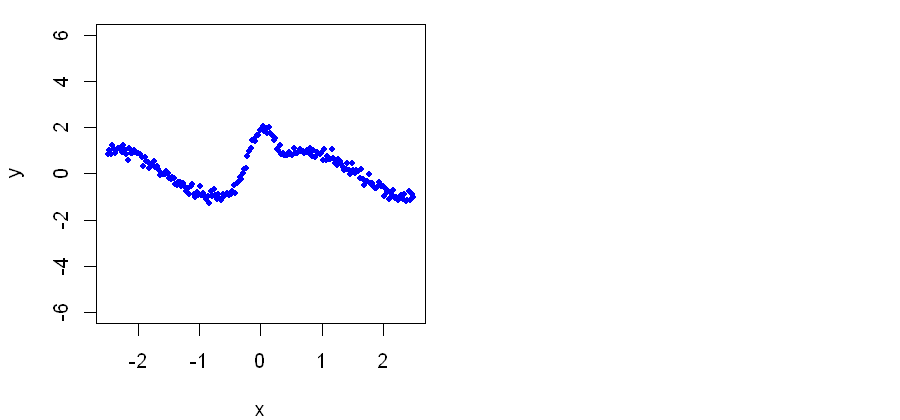

In [55]:
## main program 

# The simulated dataset is taken from Schaal and Atkeson (1998)
x = seq(-2.5,2.5,length.out=200)
n = length(x)
set.seed(1)
y = sin(2*x) + 2*exp(-16*x^2) + rnorm(n,0,.16)
ytrue = sin(2*x) + 2*exp(-16*x^2)

# Plot the simulated dataset
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
plot(x,y,ylim = c(-6,6),pch=20,col="blue")

In [56]:
# Define the parameter space for LS-SVR and ridge regression implementations
range = seq(-10,10,length.out=11)
gamma = exp(range)
sigma2 = gamma
lambda = 2^(range)

## Implementation of LS-SVR

# Tuning the hyper-parameters using 10-fold cross validation
k = 10
result1 <- tunelssvr(x,y,gamma,sigma2,k)  # result1 include optimum gamma and sigma2
opt_gamma = result1[1]
opt_sigma2 = result1[2]

# training the data with optimum hyper-parameters to obtain alpha and b
result2 <- trainlssvr(x,y,opt_gamma,opt_sigma2) # result2 include alpha and b
b = result2[1]
alpha = result2[-1]

# Predict the response 
yp <- predictlssvr(x,y,opt_gamma,opt_sigma2,alpha,b,x)

## Implementation of ridge regression

# here we use 10-order polynomial to approximate the fitting
X1 = cbind(rep(1,n),x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10)
opt_lambda1 <- tuneridge(X1,y,lambda,k)
beta1 <- ridge(X1,y,opt_lambda1)
ypr1 = X1 %*% beta1

# here we use the true predictor sin2x and exp(-16x^2) to fitting, assume the true predictor is known
X2 = cbind(rep(1,n),sin(2*x),exp(-16*x^2))
opt_lambda2 <- tuneridge(X2,y,lambda,k)
beta2 <- ridge(X2,y,opt_lambda2)
ypr2 = X2 %*% beta2

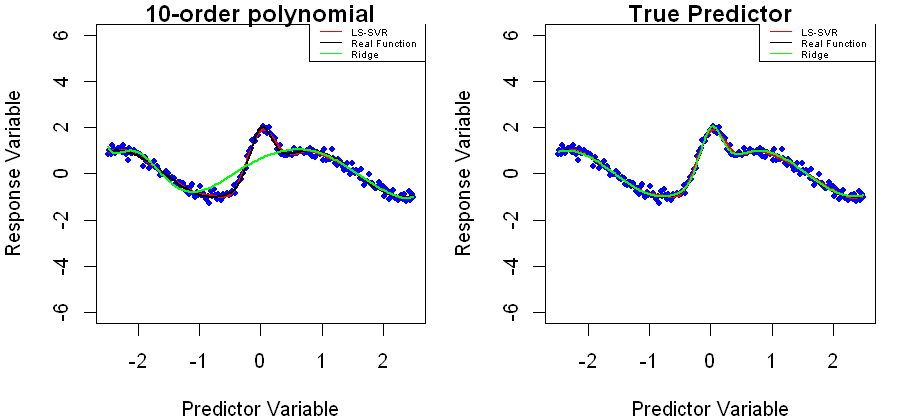

In [58]:
## plot the results

# set up the plot
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))

# plot LS-SVR, true function, and ridge regression using 10-order polynomial approximation
plot(x,y,ylim = c(-6,6),pch=20,col="blue",xlab = "Predictor Variable",ylab="Response Variable",
     main="10-order polynomial")
lines(x,yp,col="red",lwd=2)
lines(x,ytrue,col="black",lwd=2)
lines(x,ypr1,col="green",lwd=2)
legend("topright",legend=c("LS-SVR","Real Function","Ridge"),col=c("red","black","green"),lty=1,cex=0.5,y.intersp=2)

# plot LS-SVR, true function, and ridge regression using true predictor 
plot(x,y,ylim = c(-6,6),pch=20,col="blue",xlab = "Predictor Variable",ylab="Response Variable",
     main="True Predictor")
lines(x,yp,col="red",lwd=2)
lines(x,ytrue,col="black",lwd=2)
lines(x,ypr2,col="green",lwd=2)
legend("topright",legend=c("LS-SVR","Real Function","Ridge"),col=c("red","black","green"),lty=1,cex=0.5,y.intersp=2)

## Result Discussion

From the results above (left figure) , it is obviously observed that the LS-SVR can perfectly fit the simulated dataset, while the ridge regression with 10-order polynomial performs worse in some regions. This comparison illustrates that the LS-SVR, as advanced statistical learning approach, can discover the true nonlinear relation of the data, while the ridge regression fails to reflect the true nonlinear relation of the data if the good predictors are unknown (e.g., here we use cbind(rep(1,n), $x$, $x^2$, $x^3$, $x^4$, $x^5$, $x^6$, $x^7$, $x^8$, $x^9$, $x^{10}$) as the potential predictors).

From the results above (right figure), it observes that if true predictors are known (here we use cbind(rep(1,n), $sin2x$, $e^{-16x^2}$) as the true predictor), the ridge regression can give the best prediction. However, in the real world, the good predictors for physical phenomenon is typically unknown. In this case, machine learning method may be a good way to model the physical phenomenon at the expense of explaination. 

## 4.2 Simulated Dataset with Outliers

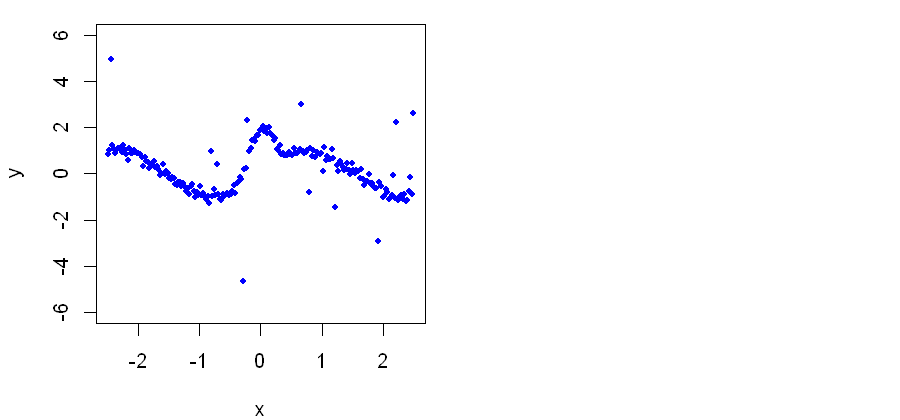

In [59]:
# Create a dataset contaminated by outliers, the contamination ratio is controlled by ratio
# Note: the dataset here is the same as that in section 4.1. The only difference is in that
#       some of data points become outliers

ratio = 0.1 # contamination ratio
numb = sample(n,n*ratio) # randomly select points from the simulated dataset as the outliers
set.seed(2)
y_c = ytrue[numb] + rnorm(n*ratio,0,2)
y[numb] = y_c

# Plot the dataset contaminated by outliers
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
plot(x,y,ylim = c(-6,6),pch=20,col="blue")

In [60]:
## Implementation of LS-SVR

# Tuning the hyper-parameters using 10-fold cross validation
k = 10
result1 <- tunelssvr(x,y,gamma,sigma2,k)  # result1 include optimum gamma and sigma2
opt_gamma = result1[1]
opt_sigma2 = result1[2]

# training the data with optimum hyper-parameters to obtain alpha and b
result2 <- trainlssvr(x,y,opt_gamma,opt_sigma2) # result2 include alpha and b
b = result2[1]
alpha = result2[-1]

# Predict the response 
yp <- predictlssvr(x,y,opt_gamma,opt_sigma2,alpha,b,x)

## Implementation of ridge regression

# here we use 10-order polynomial to approximate the fitting
X1 = cbind(rep(1,n),x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10)
opt_lambda1 <- tuneridge(X1,y,lambda,k)
beta1 <- ridge(X1,y,opt_lambda1)
ypr1 = X1 %*% beta1

## here we use the true predictor sin2x and exp(-16x^2) to fitting, assume the true predictor is known
X2 = cbind(rep(1,n),sin(2*x),exp(-16*x^2))
opt_lambda2 <- tuneridge(X2,y,lambda,k)
beta2 <- ridge(X2,y,opt_lambda2)
ypr2 = X2 %*% beta2

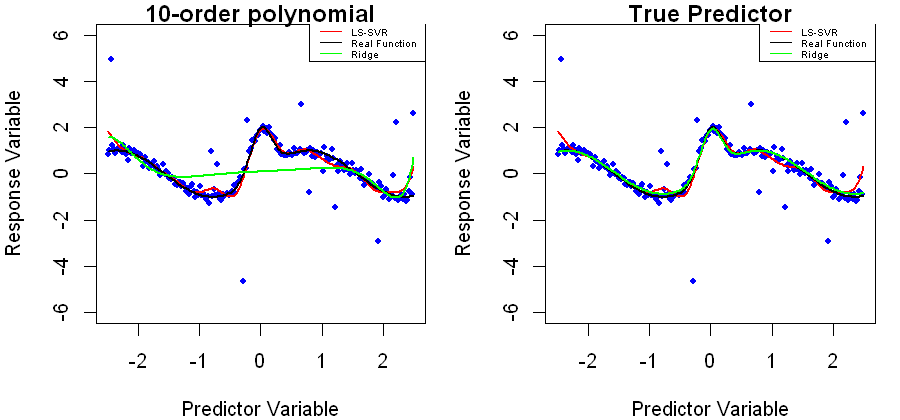

In [62]:
## plot the results

# set up the plot
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))

# plot LS-SVR, true function, and ridge regression using 10-order polynomial approximation
plot(x,y,ylim = c(-6,6),pch=20,col="blue",xlab = "Predictor Variable",ylab="Response Variable",
     main="10-order polynomial")
lines(x,yp,col="red",lwd=2)
lines(x,ytrue,col="black",lwd=2)
lines(x,ypr1,col="green",lwd=2)
legend("topright",legend=c("LS-SVR","Real Function","Ridge"),col=c("red","black","green"),lty=1,cex=0.5,y.intersp=2)

# plot LS-SVR, true function, and ridge regression using true predictor 
plot(x,y,ylim = c(-6,6),pch=20,col="blue",xlab = "Predictor Variable",ylab="Response Variable",
     main="True Predictor")
lines(x,yp,col="red",lwd=2)
lines(x,ytrue,col="black",lwd=2)
lines(x,ypr2,col="green",lwd=2)
legend("topright",legend=c("LS-SVR","Real Function","Ridge"),col=c("red","black","green"),lty=1,cex=0.5,y.intersp=2)

## Result Discussion

From the results above (left figure), it is obviously observed that both the LS-SVR and ridge regression are nagatively affected by the outliers, leading to worse prediction compared to that without outliers. However, it seems that the levels of negative interferences by outliers for LS-SVR is less than that for ridge regression. In this way, the LS-SVR performs more robust than ridge regression.

One of the interesting results is that the right figure illustrates that if the good predictors are used for ridge regression, the negative affect by outliers for ridge regression is less than that for LS-SVR. In this situation, the ridge regression performs more robust than LS-SVR.

## 5. Theory of Weighted LS-SVR and Ridge Regression

From the numerical results shown above, it observes that both LS-SVR and ridge regression (the good predictors are unknown) are sensitive to the outliers. In order to overcome this problem, the weighted versions of LS-SVR and ridge regression are developed. The detailed theory about them are presented below.

## 5.1 Theory of Weighted LS-SVR

The detailed information about the formulation of weighted LS-SVR can be found in Suykens et al. (2002). Here, we briefly summarize the formulation and present the mathmatical equations necessary for the code developement, which can be found as follows.

Given the training set $\{(x_i,y_i)\}_{i=1}^n$, where $x_i \in R^{p}$ and $y_i \in R$, the objective of the weighted LS-SVR is to find $w \in R^{h}$ and $b$ to minimize the following objective function:

\begin{align*}
min J(w,e) = \frac{1}{2}w^Tw + \frac{1}{2}\gamma\sum_{i=1}^n \omega_i e_{i}^2                        
\end{align*}           


subject to:

$$y_i = w^T\varphi(x_i) + b + e_i, i = 1,...,n$$

Where $\omega_i$ is a weight, and other variables keep the same as those introduced in section 2.1 

The Lagrangian function for the equations above can be established as follows:

$$L(w,b,e;\alpha) = J(w,e) - \sum_{i=1}^n\alpha_i\{w^T\varphi(x_i)+b+e_i-y_i\}$$

The Karush-Kuhn-Tucker(KKT) conditions for optimality are given by:

\begin{align*}
&\frac{\partial L}{\partial w}=0 \rightarrow w = \sum_{i=1}^n\alpha_i\varphi(x_i)\\
&\frac{\partial L}{\partial b}=0 \rightarrow \sum_{i=1}^n\alpha_i=0\\
&\frac{\partial L}{\partial e_i}=0 \rightarrow \alpha_i = \gamma \omega_i e_i, i = 1,...,n\\
&\frac{\partial L}{\partial \alpha_i}=0 \rightarrow w^T\varphi(x_i)+b+e_i-y_i=0, i = 1,...,n
\end{align*}

After elimination of $w,e$, one can obtain the following matrix equation:

\begin{equation}
\left[
\begin{array}{cccc}
0 & 1_{1xn}\\
1_{nx1} & K_{nxn}+\frac{1}{\gamma\omega}I_{nxn}
\end{array}
\right]
\left[
\begin{array}{cccc}
b\\
\alpha_{nx1}
\end{array}
\right]
=
\left[
\begin{array}{cccc}
0\\
y_{nx1}
\end{array}
\right ]
\end{equation}

Where $\omega \in R^n$ is a weight vector, other variables keep the same as those introduced in section 2.1.

The weight function used in this project is a function of residuals estimated by LS-SVR, which is given by:

1. if $|e_i/\hat{s}| \leq c_1$, $\omega_i = 1$

2. if $c_1\leq |e_i/\hat{s}| \leq c_2$, $\omega_i = \frac{c_2-|e_i/\hat{s}|}{c_2-c_1}$

3. otherwise, $\omega_i = 10^{-4}$

where $c_1 = 2.5$, $c_2 = 3$, $\hat{s}$ is robust parameter taken 1.483 times median absolute deviation of residuals, denoted as $\hat{s} = 1.483MAD(e)$.

The implementation procedure of weighted LS-SVR is summarized as follows:

1. Compute the residuals $e_i = \frac{\alpha_i}{\gamma}$.

2. Compute the $\hat{s}$.

3. Determine the weight $\omega_i$ based on $e_i$ and $\hat{s}$.

4. Solve the linear system of weighted LS-SVR to compute the new $\alpha$ and $b$.

5. Use the new $\alpha$ and $b$ to make predictions.

## 5.2 Theory of Weighted Ridge Regression


The weighted ridge regression is similar to weighted ordinary least squares method by adding a regularization parameter $\lambda$ to penalize the regression coefficients for avoiding the overfitting. The detailed formulation of weighted ridge regression can be easily found online. Thus, here we briefly summarize the mathmatical equations necessary for code development.

Given the training set $\{(x_i,y_i)\}_{i=1}^n$, where $x_i \in R^{p}$ and $y_i \in R$, the objective of ridge regression is to find regression coefficients $\beta \in R^{p+1}$ that minimize the following objective function

\begin{align*}
min J(\beta) = \sum_{i=1}^n \omega_ie_{i}^2 + \lambda \sum_{j=0}^p\beta_{j}^2                    
\end{align*}  

subject to:

$$y_i = \sum_{j=0}^p\beta_jx_{ij} + e_i, i = 1,...,n$$

where $x_{i0} = 1$, $\lambda$ is a regularization parameter.

The regression coefficient $\beta$ can be obtained using the following equation

$$\beta = (X^T WX + \lambda I)^{-1}X^TWy$$

where $W$ is a diagnal matrix consisting of $\{\omega_i\}_{i=1}^n$.

## 6. Development of R Code for Implementation of Weighted LS-SVR and Ridge Regression

## 6.1 R Code for Weighted LS-SVR

From the theory of weighted LS-SVR introduced in section 5.1, the only difference from LS-SVR is about the weight $\omega$, robust parameter $\hat{s}$, and new $\alpha$ and $b$. Two extra new function called $weightfun$ and $trainwlssvr$ are developed for computing the weight $\omega$, new $\alpha$ and $b$. The function $trainwlssvr$ is similar to $trainlssvr$ except there is extra variable, weight, is added and the expression of Gamma is modified. The detailed information is commented in the code below. 

In [63]:
# R code for developing the weight function
weightfun <- function(residuals,s_hat){
    # Calculate the weights
    n <- length(residuals)
    weight = matrix(0,nrow=n,ncol=1)
    for(iw in 1:n){
        if(abs(residuals[iw]/s_hat)<=2.5){
            weight[iw] = 1
        } else if(abs(residuals[iw]/s_hat>=2.5 && abs(residuals[iw]/s_hat)<=3)){
            weight[iw] = (3 - abs(residuals[iw]/s_hat)) / (3 - 2.5)
        } else {
            weight[iw] = 0.0001
        }
    }
    return(weight)
}

In [64]:
# R code for developing the weighted LS-SVR
trainwlssvr <- function(Xtrain,ytrain,gamma,sigma2,weight){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    weight <- as.vector(weight) # weight variable 
    n <- nrow(Xtrain)
    Ktr <- kernelmatrix(Xtrain,sigma2)
    ones_col <- matrix(rep(1,n),nrow=n,1)
    ones_row <- matrix(rep(1,n),nrow=1,ncol=n)
    Gamma <- (1/gamma)*diag(1/weight) # Gamma is changed to incorporate the weight
    H <- Ktr + Gamma
    eta <- solve(H,ones_col)
    nu <- solve(H,ytrain)
    s <- as.numeric(ones_row %*% eta)
    b <- as.numeric(t(eta) %*% ytrain / s)
    alpha <- nu - b*eta
    result <- c(b,alpha)
    return(result)
}


## 6.2 R Code for Weighted Ridge Regression

The weight function used is the same as those in weighted LS-SVR. An extra function named $wridge$ is developed to calculate the new regression coefficient.

In [65]:
# R code for developing weighted ridge regression function named wridge to calculate the new regression coefficient
wridge <- function(Xtrain,ytrain,lambda,weight){
    Xtrain <- as.matrix(Xtrain)
    ytrain <- as.matrix(ytrain)
    weight <- as.vector(weight)
    
    # Judge if the 1 vector is already included in the Xtrain
    if(any(!Xtrain[,1]==1)){
        print('The 1 vector is not included but will include automatically')
        ones <- rep(1,nrow(Xtrain))
        Xtrain <- cbind(ones,Xtrain)
    } 
    
    # Calculate the regression coefficients beta by constructing matrix function Ax = b
    I <- diag(rep(1,ncol(Xtrain)))
    W <- diag(weight)
    A <- t(Xtrain) %*% W %*% Xtrain + lambda*I
    b <- t(Xtrain) %*% W %*% ytrain
    beta <- solve(A,b)
    return(beta)
}

In [45]:
## Implementation of weighted LS-SVR

# Calculate the residuals and robust parameter s_hat
residuals = alpha / opt_gamma
s_hat = 1.483*mad(residuals)

# Calculate the weights
w <- weightfun(residuals,s_hat)

# Calculate the new alpha and b
result3 <- trainwlssvr(x,y,opt_gamma,opt_sigma2,w)
b = result3[1]
alpha = result3[-1]

# Predict the response 
ypr <- predictlssvr(x,y,opt_gamma,opt_sigma2,alpha,b,x)

## Implementation of weighted ridge regression

# Calculate the residuals and robust parameter for ridge regression
residuals_r = y - ypr1
s_hat_r = 1.483*mad(residuals_r)

# Calculate the weight for ridge regression
w_r <- weightfun(residuals_r,s_hat_r)

# Calculate the regression coefficient based on the weighted ridge regression
beta_r <- wridge(X1,y,opt_lambda1,w_r)
ypr1_r =  X1 %*% beta_r

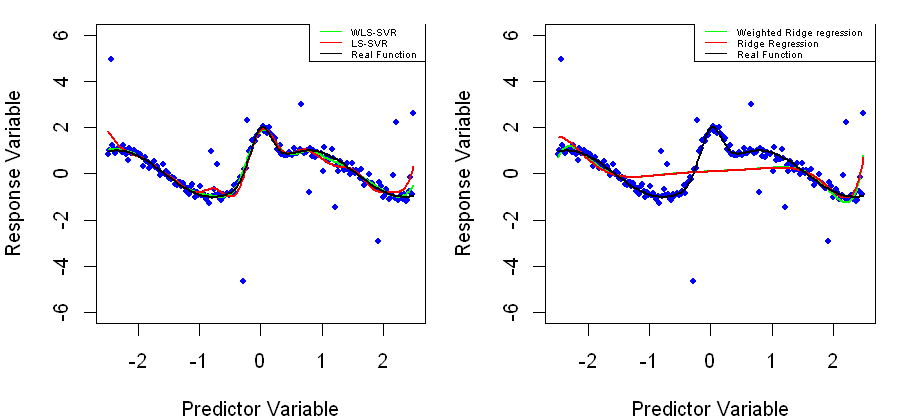

In [46]:
# plot the results
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
plot(x,y,ylim = c(-6,6),pch=20,col="blue",xlab="Predictor Variable",ylab="Response Variable")
lines(x,ypr,col="green",lwd=2)
lines(x,yp,col="red",lwd=2)
lines(x,ytrue,col="black",lwd=2)
legend("topright",legend=c("WLS-SVR","LS-SVR","Real Function"),col=c("green","red","black"),
       lty=1,cex=0.5,y.intersp=2)

plot(x,y,ylim = c(-6,6),pch=20,col="blue",xlab="Predictor Variable",ylab="Response Variable")
lines(x,ypr1_r,col="green",lwd=2)
lines(x,ypr1,col="red",lwd=2)
lines(x,ytrue,col="black",lwd=2)
legend("topright",legend=c("Weighted Ridge regression","Ridge Regression","Real Function"),
       col=c("green","red","black"),lty=1,cex=0.5,y.intersp=2)

## Result Discussion

From the results above (left figure), it is obviously observed that the weighted LS-SVR (WLS-SVR) (green line) improves the fitting of LS-SVR (red line) when the dataset is contaminated by the outliers. Specifically, the improvement done by WLS-SVR is achieved across all the regions contaminated by outliers. 

For the weighted ridge regression (right figure), the improvement done by weighted ridge regression is not obvious compared to the result obtained by ridge regression. Specifically, the relatively obvious improvement is located at one end, while other regions contaminated by outliers are not improved.

## 7. Conclusions

From this comparision studies, the following conclusions are made to answer the questions we have in the motivation section.

1. When the true predictors are unknown, the LS-SVR is an effective tool capable of modeling the nonlinear behavior of physical phenomenon at the expense of explaination. On the contrary, the ridge regression can explain the fitted model but typically gives poor prediction. 

2. When the true predicthors are known, the ridge regression performs even better than LS-SVR (note: the true predictors are not used for machine learning). However, the true predictors for some physical phenomenon are always unknown. Almost all of the disciplinaries aims to explore what are the true predictors affecting some physical phenomenon. In this situation, machine learning methods might be a potential way to assist people to understand how some physical phenonmenon happens in the future.

3. The ridge regression is more vulnerable to outliers than LS-SVR when the true predictors are unknown. However, if the true predictors are known, the ridge regression is more robust than LS-SVR.

4. Weighted least squares methods can improve the fitting of both LS-SVR and ridge regression when the dataset is containminated by outliers. However, compared to weighted LS-SVR, the improvement for weighted ridge regression is not significant. 

## 8. References

1. Suykens, J. A., Van Gestel, T., & De Brabanter, J. (2002). Least Squares Support Vector Machines. World Scientific.

2. Schaal, S., & Atkeson, C. G. (1998). Constructive incremental learning from only local information. Neural computation, 10(8), 2047-2084.

3. Suykens, J. A., De Brabanter, J., Lukas, L., & Vandewalle, J. (2002). Weighted least squares support vector machines: robustness and sparse approximation. Neurocomputing, 48(1-4), 85-105.